In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import host, user, password
from acquire import get_telco_data
import prepare as p

# Acquire

In [2]:
df = get_telco_data()

In [6]:
df.head(1).T

0
payment_type_id                             2
contract_type_id                            1
internet_service_type_id                    3
customer_id                        0030-FNXPP
gender                                 Female
senior_citizen                              0
partner                                    No
dependents                                 No
tenure                                      3
phone_service                             Yes
multiple_lines                             No
online_security           No internet service
online_backup             No internet service
device_protection         No internet service
tech_support              No internet service
streaming_tv              No internet service
streaming_movies          No internet service
paperless_billing                          No
monthly_charges                         19.85
total_charges                            57.2
churn                                      No
internet_service_type                    None
contract_type                  Month-to-month
payment_type                     Mailed check

**Things I am noticing so far that will need to be addressed:**
- total charges has incorrect data type and will need to be changed
- many columns are redundant and will need to be dropped (numeric coding of plan types has already been converted to string types via join so numeric columns are no longer needed)
- could add additional features that combine other columns (service_type, partner_dependents)
- Will need to convert all categorical columns into object dtypes or booleans


In [4]:
df.shape

(7043, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# drop the first three columns since we have info in other columns and will make dummy columns for encoding later
# drop the customer id column since it is only object column that I don't want to treat as categorical and we don't need it anymore as the index will serve as unique identifier 
df.drop(columns = ['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'customer_id'], inplace=True)

In [7]:
# change dtype of total charges to float

# first, we need to replace all empty columns with a 0

df.total_charges.replace(to_replace={' ' : '0'}, inplace = True)

In [8]:
# now convert the column to float data type

df.total_charges = df.total_charges.astype('float')

In [9]:
df.senior_citizen = np.where(df.senior_citizen == 1, 'Yes', 'No')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [11]:
df.describe().T

count         mean          std    min     25%      50%  \
tenure           7043.0    32.371149    24.559481   0.00    9.00    29.00   
monthly_charges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
total_charges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                     75%      max  
tenure             55.00    72.00  
monthly_charges    89.85   118.75  
total_charges    3786.60  8684.80

In [12]:
# plot distribution of numeric columns

# create a list of numeric column names

num_cols = df.select_dtypes(include = 'number').columns
num_cols

# loop through the list and plot a histogram for each numeric column

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

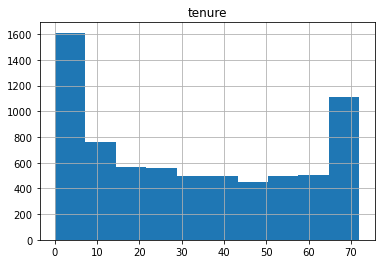

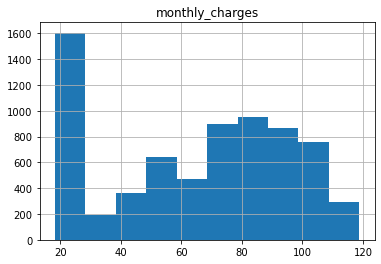

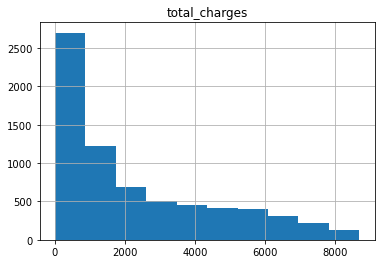

In [13]:
for col in num_cols:
    df.hist(col)
    plt.title(col)
    plt.show()

In [14]:
# describe object columns

obj_cols = df.select_dtypes(include = 'object').columns

for col in obj_cols:
    print(df[col].value_counts())
    print('\n')
    
    print(df[col].value_counts(normalize=True, dropna = False))
    print('---------------------------------\n')


Male      3555
Female    3488
Name: gender, dtype: int64


Male      0.504756
Female    0.495244
Name: gender, dtype: float64
---------------------------------

No     5901
Yes    1142
Name: senior_citizen, dtype: int64


No     0.837853
Yes    0.162147
Name: senior_citizen, dtype: float64
---------------------------------

No     3641
Yes    3402
Name: partner, dtype: int64


No     0.516967
Yes    0.483033
Name: partner, dtype: float64
---------------------------------

No     4933
Yes    2110
Name: dependents, dtype: int64


No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
---------------------------------

Yes    6361
No      682
Name: phone_service, dtype: int64


Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
---------------------------------

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64


No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name

In [15]:
# check for nulls
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [16]:
# rerun preparation using prepare.py module

df = get_telco_data()

In [17]:
df.head()

payment_type_id  contract_type_id  internet_service_type_id customer_id  \
0                2                 1                         3  0030-FNXPP   
1                2                 1                         3  0031-PVLZI   
2                1                 1                         3  0098-BOWSO   
3                1                 1                         3  0107-WESLM   
4                3                 1                         3  0114-RSRRW   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0      No         No       3           Yes  ...   
1  Female               0     Yes        Yes       4           Yes  ...   
2    Male               0      No         No      27           Yes  ...   
3    Male               0      No         No       1           Yes  ...   
4  Female               0     Yes         No      10           Yes  ...   

          tech_support         streaming_tv     streaming_movies  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2  No internet service  No internet service  No internet service   
3  No internet service  No internet service  No internet service   
4  No internet service  No internet service  No internet service   

  paperless_billing monthly_charges total_charges churn internet_service_type  \
0                No           19.85          57.2    No                  None   
1                No           20.35         76.35   Yes                  None   
2               Yes           19.40         529.8    No                  None   
3               Yes           19.85         19.85   Yes                  None   
4               Yes           19.95        187.75    No                  None   

    contract_type               payment_type  
0  Month-to-month               Mailed check  
1  Month-to-month               Mailed check  
2  Month-to-month           Electronic check  
3  Month-to-month           Electronic check  
4  Month-to-month  Bank transfer (automatic)  

[5 rows x 24 columns]

In [18]:
df = p.prepare_telco(df)

In [19]:
df.head()

gender senior_citizen partner dependents  tenure phone_service  \
0  Female             No      No         No       3           Yes   
1  Female             No     Yes        Yes       4           Yes   
2    Male             No      No         No      27           Yes   
3    Male             No      No         No       1           Yes   
4  Female             No     Yes         No      10           Yes   

  multiple_lines      online_security        online_backup  \
0             No  No internet service  No internet service   
1             No  No internet service  No internet service   
2             No  No internet service  No internet service   
3             No  No internet service  No internet service   
4             No  No internet service  No internet service   

     device_protection         tech_support         streaming_tv  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2  No internet service  No internet service  No internet service   
3  No internet service  No internet service  No internet service   
4  No internet service  No internet service  No internet service   

      streaming_movies paperless_billing  monthly_charges  total_charges  \
0  No internet service                No            19.85          57.20   
1  No internet service                No            20.35          76.35   
2  No internet service               Yes            19.40         529.80   
3  No internet service               Yes            19.85          19.85   
4  No internet service               Yes            19.95         187.75   

  churn internet_service_type   contract_type               payment_type  
0    No                  None  Month-to-month               Mailed check  
1   Yes                  None  Month-to-month               Mailed check  
2    No                  None  Month-to-month           Electronic check  
3   Yes                  None  Month-to-month           Electronic check  
4    No                  None  Month-to-month  Bank transfer (automatic)

# Prepare

#### Create dummy variables for categorical columns

In [20]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'],
      dtype='object')

In [21]:
# create a list of all categorical columns

cat_cols = df.select_dtypes(include='object').columns.tolist()

In [22]:
dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)

In [23]:
dummy_df.head()

gender_Male  senior_citizen_Yes  partner_Yes  dependents_Yes  \
0            0                   0            0               0   
1            0                   0            1               1   
2            1                   0            0               0   
3            1                   0            0               0   
4            0                   0            1               0   

   phone_service_Yes  multiple_lines_No phone service  multiple_lines_Yes  \
0                  1                                0                   0   
1                  1                                0                   0   
2                  1                                0                   0   
3                  1                                0                   0   
4                  1                                0                   0   

   online_security_No internet service  online_security_Yes  \
0                                    1                    0   
1                                    1                    0   
2                                    1                    0   
3                                    1                    0   
4                                    1                    0   

   online_backup_No internet service  ...  streaming_movies_Yes  \
0                                  1  ...                     0   
1                                  1  ...                     0   
2                                  1  ...                     0   
3                                  1  ...                     0   
4                                  1  ...                     0   

   paperless_billing_Yes  churn_Yes  internet_service_type_Fiber optic  \
0                      0          0                                  0   
1                      0          1                                  0   
2                      1          0                                  0   
3                      1          1                                  0   
4                      1          0                                  0   

   internet_service_type_None  contract_type_One year  contract_type_Two year  \
0                           1                       0                       0   
1                           1                       0                       0   
2                           1                       0                       0   
3                           1                       0                       0   
4                           1                       0                       0   

   payment_type_Credit card (automatic)  payment_type_Electronic check  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              1   
3                                     0                              1   
4                                     0                              0   

   payment_type_Mailed check  
0                          1  
1                          1  
2                          0  
3                          0  
4                          0  

[5 rows x 28 columns]

In [24]:
# concat dummy columns to original df but save to new df so we can use original df for exploration
df_w_dummies = pd.concat([df, dummy_df], axis=1)

In [25]:
df_w_dummies.head()

gender senior_citizen partner dependents  tenure phone_service  \
0  Female             No      No         No       3           Yes   
1  Female             No     Yes        Yes       4           Yes   
2    Male             No      No         No      27           Yes   
3    Male             No      No         No       1           Yes   
4  Female             No     Yes         No      10           Yes   

  multiple_lines      online_security        online_backup  \
0             No  No internet service  No internet service   
1             No  No internet service  No internet service   
2             No  No internet service  No internet service   
3             No  No internet service  No internet service   
4             No  No internet service  No internet service   

     device_protection  ... streaming_movies_Yes paperless_billing_Yes  \
0  No internet service  ...                    0                     0   
1  No internet service  ...                    0                     0   
2  No internet service  ...                    0                     1   
3  No internet service  ...                    0                     1   
4  No internet service  ...                    0                     1   

  churn_Yes internet_service_type_Fiber optic  internet_service_type_None  \
0         0                                 0                           1   
1         1                                 0                           1   
2         0                                 0                           1   
3         1                                 0                           1   
4         0                                 0                           1   

   contract_type_One year contract_type_Two year  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   

  payment_type_Credit card (automatic) payment_type_Electronic check  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             1   
3                                    0                             1   
4                                    0                             0   

  payment_type_Mailed check  
0                         1  
1                         1  
2                         0  
3                         0  
4                         0  

[5 rows x 48 columns]

In [26]:
# drop columns that were just dummied
df_w_dummies.drop(columns=cat_cols, inplace=True)

In [27]:
df_w_dummies.head()

tenure  monthly_charges  total_charges  gender_Male  senior_citizen_Yes  \
0       3            19.85          57.20            0                   0   
1       4            20.35          76.35            0                   0   
2      27            19.40         529.80            1                   0   
3       1            19.85          19.85            1                   0   
4      10            19.95         187.75            0                   0   

   partner_Yes  dependents_Yes  phone_service_Yes  \
0            0               0                  1   
1            1               1                  1   
2            0               0                  1   
3            0               0                  1   
4            1               0                  1   

   multiple_lines_No phone service  multiple_lines_Yes  ...  \
0                                0                   0  ...   
1                                0                   0  ...   
2                                0                   0  ...   
3                                0                   0  ...   
4                                0                   0  ...   

   streaming_movies_Yes  paperless_billing_Yes  churn_Yes  \
0                     0                      0          0   
1                     0                      0          1   
2                     0                      1          0   
3                     0                      1          1   
4                     0                      1          0   

   internet_service_type_Fiber optic  internet_service_type_None  \
0                                  0                           1   
1                                  0                           1   
2                                  0                           1   
3                                  0                           1   
4                                  0                           1   

   contract_type_One year  contract_type_Two year  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   payment_type_Credit card (automatic)  payment_type_Electronic check  \
0                                     0                              0   
1                                     0                              0   
2                                     0                              1   
3                                     0                              1   
4                                     0                              0   

   payment_type_Mailed check  
0                          1  
1                          1  
2                          0  
3                          0  
4                          0  

[5 rows x 31 columns]

#### Split data into train/validate/test

In [28]:
# 60% train, 20% validate, 20% test
train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)

In [29]:
# see shape of new dfs
train.shape, validate.shape, test.shape

((4225, 31), (1409, 31), (1409, 31))

In [30]:
# make sure split proportions worked properly
train.shape[0]/df_w_dummies.shape[0], validate.shape[0]/df_w_dummies.shape[0], test.shape[0]/df_w_dummies.shape[0]

(0.5998864120403238, 0.20005679397983814, 0.20005679397983814)

In [31]:
df_w_dummies.isnull().sum()

tenure                                   0
monthly_charges                          0
total_charges                            0
gender_Male                              0
senior_citizen_Yes                       0
partner_Yes                              0
dependents_Yes                           0
phone_service_Yes                        0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_protection_No internet service    0
device_protection_Yes                    0
tech_support_No internet service         0
tech_support_Yes                         0
streaming_tv_No internet service         0
streaming_tv_Yes                         0
streaming_movies_No internet service     0
streaming_movies_Yes                     0
paperless_billing_Yes                    0
churn_Yes  

In [32]:
# no nulls, therefore imputation is not necessary here

In [33]:
# test this using functions from prepare module

In [39]:
df = get_telco_data()

In [40]:
df.head()

payment_type_id  contract_type_id  internet_service_type_id customer_id  \
0                2                 1                         3  0030-FNXPP   
1                2                 1                         3  0031-PVLZI   
2                1                 1                         3  0098-BOWSO   
3                1                 1                         3  0107-WESLM   
4                3                 1                         3  0114-RSRRW   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0      No         No       3           Yes  ...   
1  Female               0     Yes        Yes       4           Yes  ...   
2    Male               0      No         No      27           Yes  ...   
3    Male               0      No         No       1           Yes  ...   
4  Female               0     Yes         No      10           Yes  ...   

          tech_support         streaming_tv     streaming_movies  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2  No internet service  No internet service  No internet service   
3  No internet service  No internet service  No internet service   
4  No internet service  No internet service  No internet service   

  paperless_billing monthly_charges total_charges churn internet_service_type  \
0                No           19.85          57.2    No                  None   
1                No           20.35         76.35   Yes                  None   
2               Yes           19.40         529.8    No                  None   
3               Yes           19.85         19.85   Yes                  None   
4               Yes           19.95        187.75    No                  None   

    contract_type               payment_type  
0  Month-to-month               Mailed check  
1  Month-to-month               Mailed check  
2  Month-to-month           Electronic check  
3  Month-to-month           Electronic check  
4  Month-to-month  Bank transfer (automatic)  

[5 rows x 24 columns]

In [41]:
df = p.prepare_telco(df)

In [42]:
df.head()

gender senior_citizen partner dependents  tenure phone_service  \
0  Female             No      No         No       3           Yes   
1  Female             No     Yes        Yes       4           Yes   
2    Male             No      No         No      27           Yes   
3    Male             No      No         No       1           Yes   
4  Female             No     Yes         No      10           Yes   

  multiple_lines      online_security        online_backup  \
0             No  No internet service  No internet service   
1             No  No internet service  No internet service   
2             No  No internet service  No internet service   
3             No  No internet service  No internet service   
4             No  No internet service  No internet service   

     device_protection         tech_support         streaming_tv  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2  No internet service  No internet service  No internet service   
3  No internet service  No internet service  No internet service   
4  No internet service  No internet service  No internet service   

      streaming_movies paperless_billing  monthly_charges  total_charges  \
0  No internet service                No            19.85          57.20   
1  No internet service                No            20.35          76.35   
2  No internet service               Yes            19.40         529.80   
3  No internet service               Yes            19.85          19.85   
4  No internet service               Yes            19.95         187.75   

  churn internet_service_type   contract_type               payment_type  
0    No                  None  Month-to-month               Mailed check  
1   Yes                  None  Month-to-month               Mailed check  
2    No                  None  Month-to-month           Electronic check  
3   Yes                  None  Month-to-month           Electronic check  
4    No                  None  Month-to-month  Bank transfer (automatic)

In [44]:
train, validate, test = p.dummy_and_split(df)

In [45]:
# see shape of new dfs
train.shape, validate.shape, test.shape

((4225, 31), (1409, 31), (1409, 31))

In [46]:
train.head()

tenure  monthly_charges  total_charges  gender_Male  senior_citizen_Yes  \
6169      72           105.50        7544.00            0                   0   
3290      28            49.90        1410.25            0                   0   
3615       5            24.95         100.40            1                   0   
6309      39           100.55        3895.35            1                   0   
856       45            93.90        4200.25            1                   1   

      partner_Yes  dependents_Yes  phone_service_Yes  \
6169            1               0                  1   
3290            1               1                  1   
3615            1               0                  0   
6309            0               1                  1   
856             0               0                  1   

      multiple_lines_No phone service  multiple_lines_Yes  ...  \
6169                                0                   1  ...   
3290                                0                   1  ...   
3615                                1                   0  ...   
6309                                0                   1  ...   
856                                 0                   1  ...   

      streaming_movies_Yes  paperless_billing_Yes  churn_Yes  \
6169                     1                      1          0   
3290                     0                      0          0   
3615                     0                      1          1   
6309                     1                      0          0   
856                      1                      1          0   

      internet_service_type_Fiber optic  internet_service_type_None  \
6169                                  1                           0   
3290                                  0                           0   
3615                                  0                           0   
6309                                  1                           0   
856                                   1                           0   

      contract_type_One year  contract_type_Two year  \
6169                       0                       1   
3290                       0                       0   
3615                       0                       0   
6309                       0                       1   
856                        0                       0   

      payment_type_Credit card (automatic)  payment_type_Electronic check  \
6169                                     0                              1   
3290                                     0                              0   
3615                                     0                              1   
6309                                     0                              0   
856                                      0                              0   

      payment_type_Mailed check  
6169                          0  
3290                          1  
3615                          0  
6309                          1  
856                           0  

[5 rows x 31 columns]

In [ ]:
# seems to be working properly so far